In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class ODESolver:
    def __init__(self, a, b, c, f, u0, u, bounds, h):
        self.a = a
        self.b = b
        self.c = c
        self.f = f
        self.u0 = u0
        self.u = u
        self.s = len(self.c)
        self.lb = bounds[0]
        self.rb = bounds[1]
        self.h = h
        self.x = []
        cur_p = self.lb
        while cur_p <= self.rb:
            self.x.append(cur_p)
            cur_p += self.h
        self.pts_number = len(self.x)
        self.un = np.zeros(self.pts_number)
        self.un[0] = self.u0
        
        # Make the list of k-functions
        k1 = lambda x, y, myh: self.f(x, y)
        k2 = lambda x, y, myh: self.f(x + (self.c[1] * myh), y + (self.a[1][0] * myh * k1(x, y, myh)))
        k3 = lambda x, y, myh: self.f(x + (self.c[2] * myh), y + (self.a[2][0] * myh * k1(x, y, myh)) \
                                    + (self.a[2][1] * myh * k2(x, y, myh)))
        self.k = [k1, k2, k3]
        
    def solve(self):
        for pt in range(self.pts_number-1):
            tmp_sum = 0
            for j in range(self.s):
                tmp_sum += self.b[j] * self.k[j](self.x[pt], self.un[pt], self.h)
            tmp_sum *= self.h
            
            self.un[pt+1] = (self.un[pt] + tmp_sum)
            
    def error(self):
        return max(abs(self.un - self.u(self.x)))

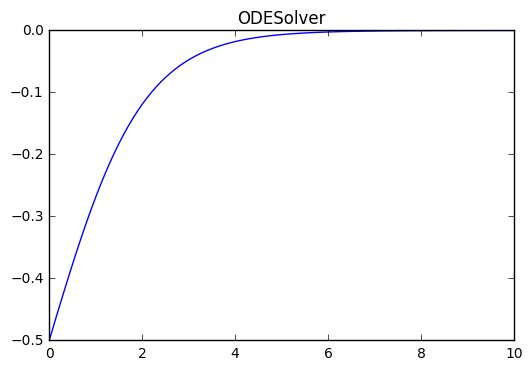

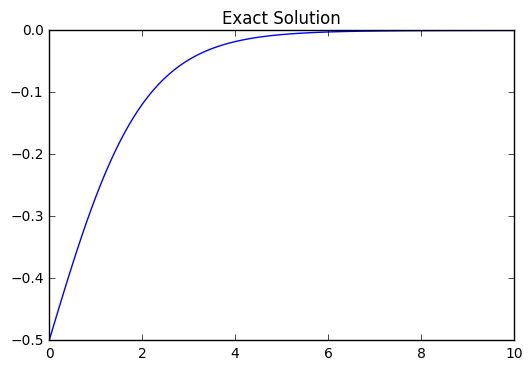

Error: 6.878412204272544e-06


In [3]:
a = [[0, 0, 0],
     [1/2, 0, 0],
     [-1, 2, 0]]
b = [1/6, 2/3, 1/6]
c = [0, 1/2, 1]

f = lambda x, u: np.exp(x) * (u ** 2)
u0 = -1/2
u = lambda x: -1/(np.exp(x) + 1)
bounds = (0,10)

# (a, b, c, f, u0, u, bounds, h)
solver = ODESolver(a, b, c, f, u0, u, bounds, 0.1)
solver.solve()

plt.figure()
plt.plot(solver.x, solver.un)
plt.title('ODESolver')
plt.show()

plt.figure()
x = np.linspace(0,10,100)
plt.plot(x, u(x))
plt.title('Exact Solution')
plt.show()

print('Error: {}'.format(solver.error()))

In [4]:
nested_nets = []
errors = []
h = 1
for i in range(10):
    solver = ODESolver(a, b, c, f, u0, u, bounds, h)
    solver.solve()
    errors.append(solver.error())
    nested_nets.append(h)
    print(solver.error(), h)
    h /= 2

0.0207978025826 1
0.00140185011591 0.5
0.000128694585331 0.25
1.38366330225e-05 0.125
1.60718075e-06 0.0625
1.93820752503e-07 0.03125
2.37999073366e-08 0.015625
2.94880393714e-09 0.0078125
3.66976740662e-10 0.00390625
4.57709564694e-11 0.001953125


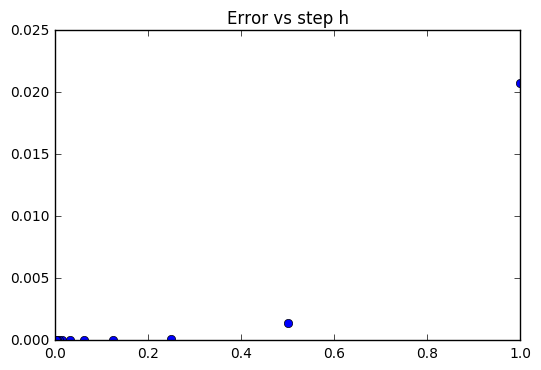

In [5]:
plt.figure()
plt.plot(nested_nets, errors, 'bo')
plt.title('Error vs step h')
plt.show()

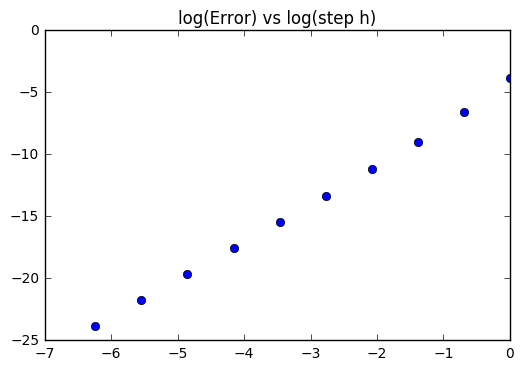

In [6]:
plt.figure()
plt.plot(np.log(nested_nets), np.log(errors), 'bo')
plt.title('log(Error) vs log(step h)')
plt.show()

In [413]:
np.polyfit(np.log(nested_nets), np.log(errors), 1)

array([ 3.14884337, -4.38974997])